In [4]:
# import library
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [5]:
# set default directory
os.chdir('/home/lbertel/code/talento_tech/content')

# set style matplotlib
plt.style.use('tableau-colorblind10')

# load data
colombia_df = pd.read_csv('data/processed/colombia_data.csv')
colombia_df.head(10)

,YEAR,MONTH,PRODUCT,VALUE
0,2014,1,Hydro,3903.977
1,2014,1,Wind,5.648
2,2014,1,Solar,1.065
3,2014,1,Coal,521.938
4,2014,1,Oil,139.219
5,2014,1,Natural gas,1031.146
6,2014,1,Combustible renewables,99.721
7,2014,1,Net electricity production,5702.714
8,2014,1,Electricity supplied,5555.847
9,2014,1,Distribution losses,536.164


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


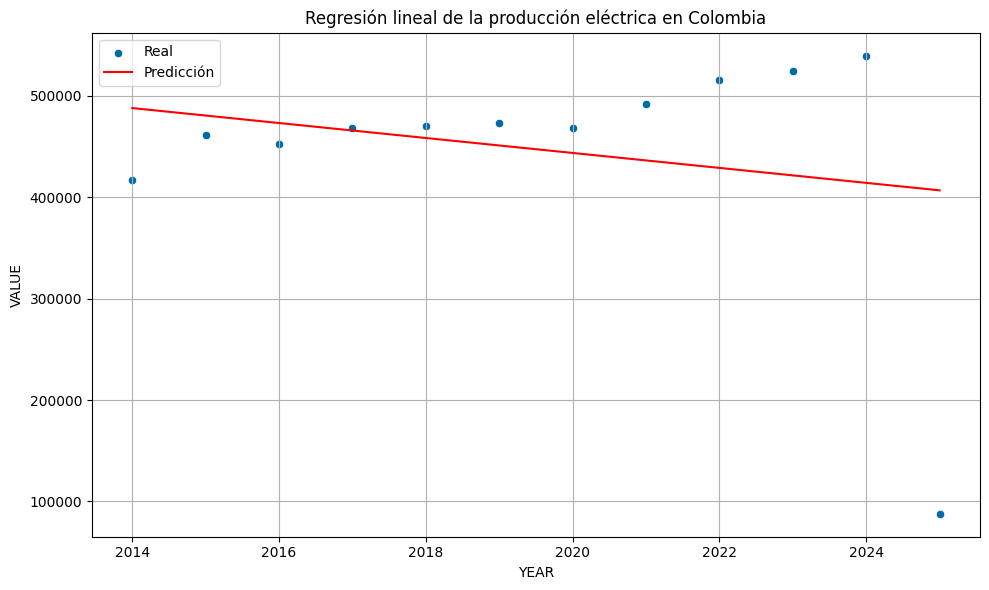

In [9]:
# Group by year and add up total production
df_total = colombia_df.groupby('YEAR')['VALUE'].sum().reset_index()

# Create regression model
X = df_total[['YEAR']]
y = df_total['VALUE']
model = LinearRegression().fit(X, y)

# Predictions
df_total['PREDICCION'] = model.predict(X)

# Show results
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_total, x='YEAR', y='VALUE', label='Real')
sns.lineplot(data=df_total, x='YEAR', y='PREDICCION', color='red', label='Predicción')
plt.title('Regresión lineal de la producción eléctrica en Colombia')
plt.grid(True)
plt.legend()
#plt.show()
#plt.savefig("fig_18.eps")

plt.tight_layout()
plt.savefig("fig_18.eps")